# Lab 10: Peer-to-peer feedback on Lab 8 (NumPy challenge)
## (1.5 pts; due Wed, Nov 29, at 11:59 pm)
---

## Background

Part of being a good data scientist is providing constructive feedback to your peers or teammates about their code. The point of this lab is to go through the notebook assigned to you and provide tips/corrections/guidance where necessary. You can access your assigned notebook by going into the `lab10-assigned-notebooks` directory and working on the one that has your first name in its title. 

There are several ways this exercise will be helpful for you:
- You must try to understand the intentions of another coder; frequently, this causes you to think differently about a problem as well
- You need to understand why something does or does *not* work
- You have to be able to articulate clearly to someone else what works and what doesn't, and how to go about fixing what doesn't
- In the wild, whether in a lab/start-up/clinic/etc. you will have to provide feedback to your team about code; the more you practice this skill, the better teammate you will be

As a template, I've posted my answer to the lab challenges in the cell below. This is not the *only* way to solve the problem, but it is an effective one. Use it as much as it is helpful for you. 

Time will be given in the next lab or two to work on this. I know this is the first time for many of you that you've been asked to provide formal feedback on someone else's code. Hence, I'm not expecting anything extremely polished, but I am expecting thoughtfulness. At a bare minimum, you should demonstrate that you understand the solution to the problems, you can spot errors in code, and you can offer suggestions in a succinct and positive manner. 

## Instructions

1) Create a cell (or cells) below each problem in *your* assigned notebook to provide your feedback, which can be in the form of complete sentences or bullet points&mdash;whichever you prefer. Where there is something off in your peer's code, you are *not* to simply write down the "correct" code, but you are being asked to provide guidance on how to *arrive* at the correct code. Of course, for "off by one" and simple syntax errors (forgetting to close a set of brackets), you can just bring your peer's attention to the mistake(s). If you happen to get a notebook for which the answer is correct, the code is clear and efficient, and there is nothing wrong, you can still practice giving feedback by looking at my solution and seeing where theirs differs and then explaining to them another way of solving the problem (i.e., mine). This will require you to understand my solution and be able to explain the logic, and again, not to simply reiterate the solution. I'm not having you do this because my solution is the only way, but because it's a good exercise in getting inside someone else's coding logic. 

2) Go through the following rubric and assign a score:

- **1.5 pts:** Meets all criteria of the lab/assignment; clean, readable code and/or thoughtful, logical response that is easily understood, interpretable
- **1.13 pts:** Overall, sensible answer that can produce largely accurate output/logical explanation. Possibly one or two notable issues in either conception, implementation, style, or explanation.
- **0.75 pts:** Significant problems with answer, but code is executable and produces some sensible output; answer(s) are off; some traceable logic
- **0 pts:** Weak answer that has little (or nothing) to do with task; low-quality code; clearly little effort and/or time put into assignment

3) Submit your assigned notebook on Canvas as both .ipynb and .html files. You don't need to change the name of the notebook.


---
## Problems and Solutions for Lab 8

### Part 1

Because your neighbors keep defeating you in the holiday house decorating contest year after year, you've decided to deploy one million lights in a 1000x1000 grid. Furthermore, because you've been especially nice this year, Santa has mailed you instructions on how to display the ideal lighting configuration.

Lights in your grid are numbered from 0 to 999 in each direction; the lights at each corner are at 0,0, 0,999, 999,999, and 999,0. The instructions include whether to turn on, turn off, or toggle various inclusive ranges given as coordinate pairs. Each coordinate pair represents opposite corners of a rectangle, inclusive; a coordinate pair like 0,0 through 2,2 therefore refers to 9 lights in a 3x3 square. The lights all start turned off.

To defeat your neighbors this year, all you have to do is set up your lights by doing the instructions Santa sent you in order.

For example:

    turn on 0,0 through 999,999 would turn on (or leave on) every light.
    toggle 0,0 through 999,0 would toggle the first line of 1000 lights, turning off the ones that were on, and turning on the ones that were off.
    turn off 499,499 through 500,500 would turn off (or leave off) the middle four lights.

After following the instructions, how many lights are lit?

In [1]:
# HYOSUB'S SOLUTION TO PART 1

# Imports
import matplotlib.pyplot as plt
import numpy as np

# Initialize 2-D matrix of lights
lights = np.zeros((1000, 1000))

# Code given to read-in file
with open("data/A6_input.txt") as fp:
    for line in fp:
        e = line.strip().split(" ")
        # print(e)  # Uncomment to see instructions
        # Toggle lines have start position as second element whereas for others
        # it is third element
        if e[0] == 'toggle':
            start = e[1].split(',')  # Split string into two elements
        else:
            start = e[2].split(',')
        end = e[-1].split(',')
        
        x1, y1 = [int(start[0]), int(start[1])]  # Convert string to int
        x2, y2 = [int(end[0]), int(end[1])]      # Convert string to int
        
        if e[1] == 'on':
            lights[x1:x2+1, y1:y2+1] = np.where(lights[x1:x2+1, y1:y2+1] == 0, 1, 1)
        elif e[1] == 'off':
            lights[x1:x2+1, y1:y2+1] = np.where(lights[x1:x2+1, y1:y2+1] == 1, 0, 0)
        else:
            lights[x1:x2+1, y1:y2+1] = np.where(lights[x1:x2+1, y1:y2+1] == 1, 0, 1)

print(f"There are a total of {lights.sum():.0f} lights lit up.")


There are a total of 569999 lights lit up.


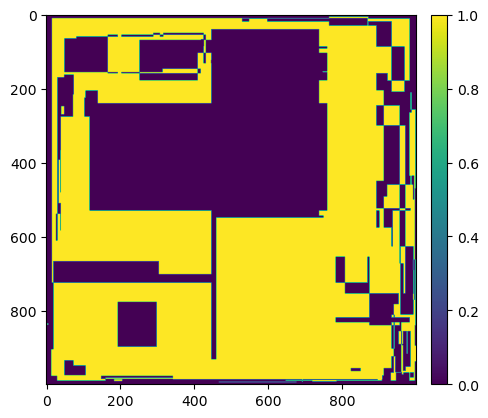

In [2]:
# BONUS FUN (PLOTTING THE LIGHTS)
image = plt.imshow(lights)
cax = plt.axes([0.825, 0.11, 0.025, 0.77])
plt.colorbar(cax=cax)
plt.show()

### Part 2

You just finish implementing your winning light pattern when you realize you mistranslated Santa's message from Ancient Nordic Elvish. The light grid you bought actually has individual brightness controls; each light can have a brightness of zero or more. The lights all start at zero.

- The phrase turn on actually means that you should increase the brightness of those lights by 1.
- The phrase turn off actually means that you should decrease the brightness of those lights by 1, to a minimum of zero.
- The phrase toggle actually means that you should increase the brightness of those lights by 2.

What is the total brightness of all lights combined after following Santa's instructions?

For example:

    turn on 0,0 through 0,0 would increase the total brightness by 1.
    toggle 0,0 through 999,999 would increase the total brightness by 2000000.


In [3]:
# HYOSUB'S SOLUTION TO PART 2

# Initialize your lights again
lights = np.zeros((1000, 1000))

# Code given to read-in file
with open("data/A6_input.txt") as fp:
    for line in fp:
        e = line.strip().split(" ")
        # print(e)  # Uncomment to see instructions
        if e[0] == 'toggle':
            start = e[1].split(',')
        else:
            start = e[2].split(',')
        end = e[-1].split(',')
        
        x1, y1 = [int(start[0]), int(start[1])]
        x2, y2 = [int(end[0]), int(end[1])]
        
        if e[1] == 'on':
            lights[x1:x2+1, y1:y2+1] += 1
        elif e[1] == 'off':
            lights[x1:x2+1, y1:y2+1] = np.where(lights[x1:x2+1, y1:y2+1] > 0, \
                                                np.subtract(lights[x1:x2+1, y1:y2+1], 1), \
                                                lights[x1:x2+1, y1:y2+1])
        else:
            lights[x1:x2+1, y1:y2+1] += 2

print(f"There are a total of {lights.sum():.0f} lights that are lit up.")

There are a total of 17836115 lights that are lit up.


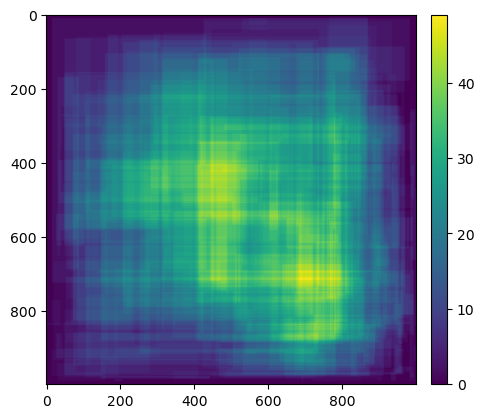

In [4]:
# BONUS FUN (PLOTTING THE LIGHTS)
image = plt.imshow(lights)
cax = plt.axes([0.825, 0.11, 0.025, 0.77])
plt.colorbar(cax=cax)
plt.show()